# Logistic Regression

### 1. Importing Data

In [1]:
import pandas as pd 

In [2]:
titanic=pd.read_csv('titanic train.csv')

In [3]:
titanic.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [4]:
print('the number of rows is {}'.format(titanic.shape[0]))

the number of rows is 891


### 2. Missing data

In [5]:
import missingno as msn 

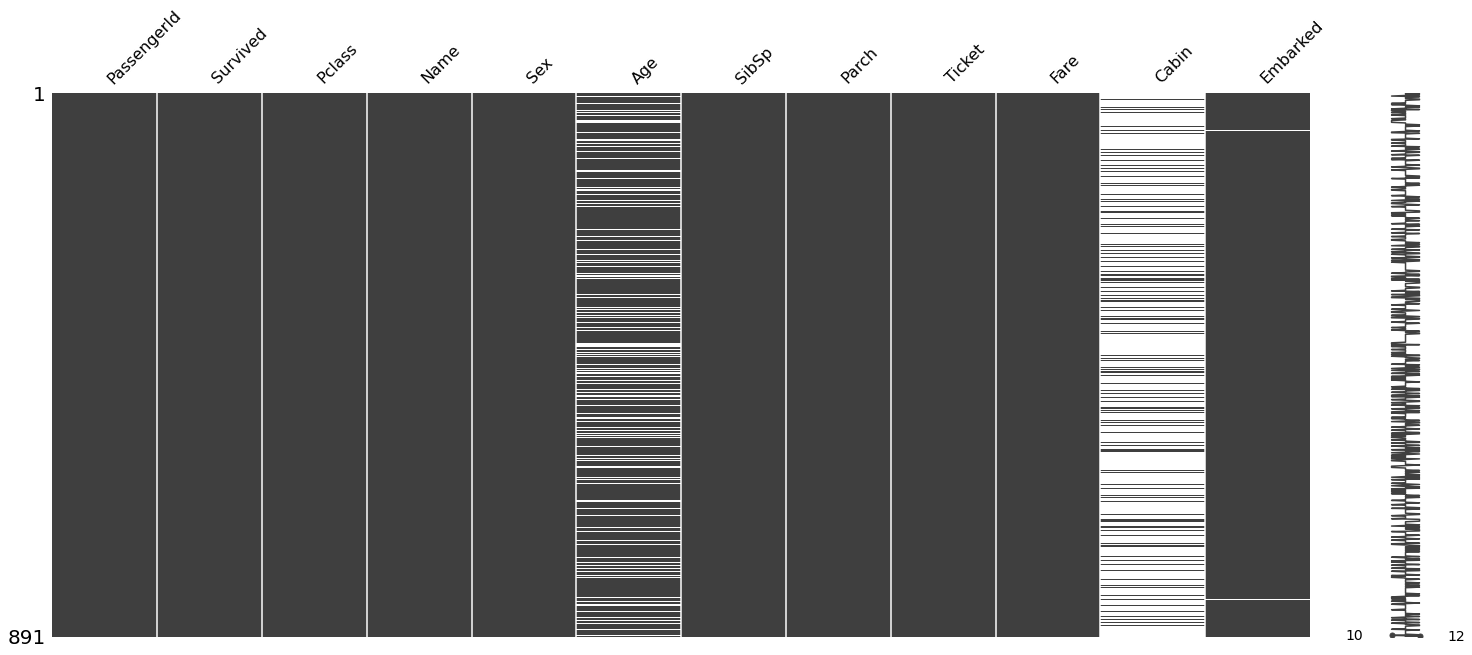

In [6]:
msn.matrix(titanic)
## we can see 'Age and Cabin have missing values'

In [7]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
#percentage of missing values 
age_missing=(titanic[['Age']].isna().sum()/titanic.shape[0])*100
cabin_missing=(titanic[['Cabin']].isna().sum()/titanic.shape[0])*100
(age_missing,cabin_missing)
## age has 19% and cabin has 77% of missing values

(Age    19.86532
 dtype: float64,
 Cabin    77.104377
 dtype: float64)

In [9]:
#filling missing values 
titanic['Age'].fillna(titanic['Age'].median(skipna=True), inplace=True)
titanic['Embarked'].fillna(titanic.Embarked.value_counts().idxmax(), inplace=True)
titanic.drop('Cabin', axis=1, inplace=True)

In [10]:
titanic.isnull().sum()
##Good

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [11]:
titanic.index=titanic['PassengerId']

In [12]:
titanic.drop('PassengerId', axis=1, inplace=True)

In [13]:
titanic.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S


### 3. Creating Additional Features

In [14]:
import numpy as np

In [15]:
titanic['TravelAlone']=np.where((titanic['SibSp']+titanic['Parch'])>0,0,1)
## np.where(condition,x,y)
## x=the part that meets the condition
## y= the part that does not meet the condition

In [16]:
titanic.drop(['SibSp','Parch'],axis=1,inplace=True)

In [17]:
titanic.drop(['Name','Ticket'], axis=1, inplace=True)

In [18]:
titanic.reset_index(inplace=True)

In [19]:
titanic.drop('PassengerId', axis=1, inplace=True)

In [20]:
titanic=pd.get_dummies(titanic,columns=['Pclass','Embarked','Sex']) # we use this function to transform categorical data into numerical ones 

In [21]:
titanic.drop('Sex_female', axis=1, inplace=True)

In [22]:
titanic.head(4)

,Survived,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,0,22.0,7.2500,0,0,0,1,0,0,1,1
1,1,38.0,71.2833,0,1,0,0,1,0,0,0
2,1,26.0,7.9250,1,0,0,1,0,0,1,0
3,1,35.0,53.1000,0,1,0,0,0,0,1,0


In [23]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int64  
 1   Age          891 non-null    float64
 2   Fare         891 non-null    float64
 3   TravelAlone  891 non-null    int32  
 4   Pclass_1     891 non-null    uint8  
 5   Pclass_2     891 non-null    uint8  
 6   Pclass_3     891 non-null    uint8  
 7   Embarked_C   891 non-null    uint8  
 8   Embarked_Q   891 non-null    uint8  
 9   Embarked_S   891 non-null    uint8  
 10  Sex_male     891 non-null    uint8  
dtypes: float64(2), int32(1), int64(1), uint8(7)
memory usage: 30.6 KB


### 4. EDA

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

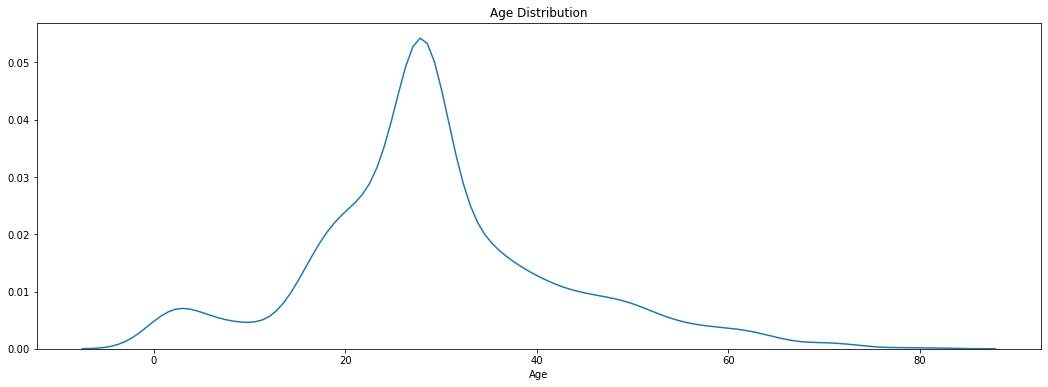

In [25]:
#AGE
plt.figure(figsize=(18,6))
plt.title('Age Distribution')
sns.distplot(titanic['Age'], hist=False)
## we can see that people between 20 and 40 were many in boat compared to other ages

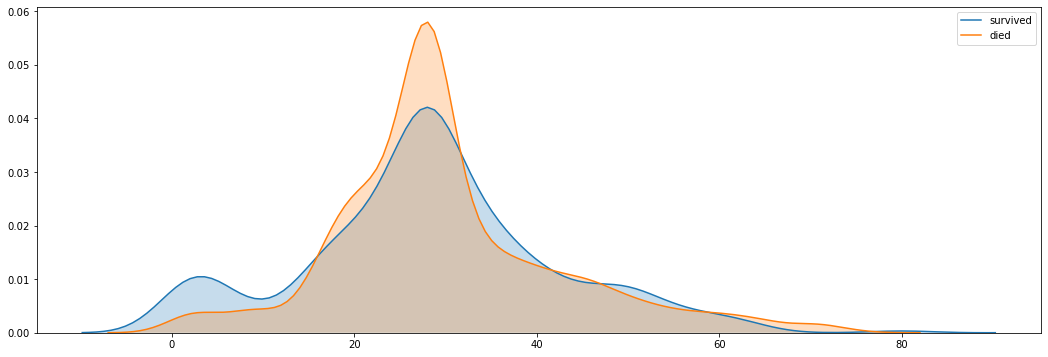

In [26]:
#AGE AND SURVIVED
plt.figure(figsize=(18,6))
sns.kdeplot(titanic['Age'][titanic.Survived==1], label='survived', shade=True)
sns.kdeplot(titanic['Age'][titanic.Survived==0], label='died', shade=True)
plt.legend()

In [27]:
titanic['isMinor']=np.where(titanic['Age']<16,1,0)

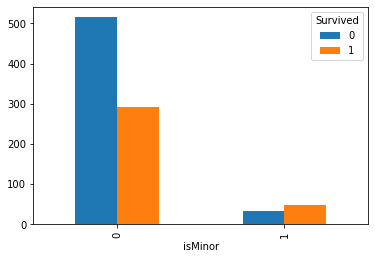

In [28]:
pd.crosstab(index=titanic['isMinor'], columns=titanic['Survived']).plot(kind='bar')

In [29]:
titanic.sample(10)

,Survived,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male,isMinor
586,0,47.0,15.0000,1,0,1,0,0,0,1,1,0
34,0,28.0,82.1708,0,1,0,0,1,0,0,1,0
788,1,1.0,20.5750,0,0,0,1,0,0,1,1,1
824,0,2.0,39.6875,0,0,0,1,0,0,1,1,1
483,1,63.0,9.5875,1,0,0,1,0,0,1,0,0
492,0,55.0,30.5000,1,1,0,0,0,0,1,1,0
628,0,26.0,7.8958,1,0,0,1,0,0,1,1,0
284,0,28.0,26.0000,1,1,0,0,0,0,1,1,0
756,0,28.0,7.7958,1,0,0,1,0,0,1,1,0
3,1,35.0,53.1000,0,1,0,0,0,0,1,0,0


### 5. Feature Selection

#### 5.0 Defining Targets and other variables

In [30]:
#Selecting features
cols=["Age","Fare","TravelAlone","Pclass_1","Pclass_2","Embarked_C","Embarked_S","Sex_male","isMinor"]
X=titanic[cols]
y=titanic['Survived']

In [31]:
X.head(4)

,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Embarked_C,Embarked_S,Sex_male,isMinor
0,22.0,7.2500,0,0,0,0,1,1,0
1,38.0,71.2833,0,1,0,1,0,0,0
2,26.0,7.9250,1,0,0,0,1,0,0
3,35.0,53.1000,0,1,0,0,1,0,0


#### 5.1 Selecting most important Features

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE # Recursive feature elimination

In [33]:
# Calling the logistic regression
model=LogisticRegression()

In [34]:
# feature selection using RFE
rfe=RFE(model,8)
rfe=rfe.fit(X,y)
## those are important features according to RFE

C:\Users\write\Anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass n_features_to_select=8 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\write\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\write\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of i

In [35]:
(rfe.n_features_,X.columns[rfe.support_])
##Now can print out the columns that are more needed
## As you can see fare is left out

(8,
 Index(['Age', 'TravelAlone', 'Pclass_1', 'Pclass_2', 'Embarked_C',
        'Embarked_S', 'Sex_male', 'isMinor'],
       dtype='object'))

#### 5.2 Selecting most important features using RFECV

In [36]:
# feature selection using RFE and cross validation
from sklearn.feature_selection import RFECV

In [37]:
rfecv=RFECV(estimator=LogisticRegression(), step=1, cv=10, scoring='accuracy')
rfecv.fit(X,y)

C:\Users\write\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\write\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\write\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\write\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

RFECV(cv=10, estimator=LogisticRegression(), scoring='accuracy')

In [38]:
# Now lets print out the columns that are very important to our model
(rfecv.n_features_,
X.columns[rfecv.support_])

(8,
 Index(['Age', 'TravelAlone', 'Pclass_1', 'Pclass_2', 'Embarked_C',
        'Embarked_S', 'Sex_male', 'isMinor'],
       dtype='object'))

In [39]:
rfecv.grid_scores_

array([0.78672909, 0.78672909, 0.78672909, 0.79009988, 0.78672909,
       0.78677903, 0.78902622, 0.80022472, 0.79911361])

In [40]:
# Selected features
selected_features=['Age','TravelAlone', 'Pclass_1', 'Pclass_2', 'Embarked_C',
        'Embarked_S', 'Sex_male', 'isMinor']

In [41]:
X=titanic[selected_features]

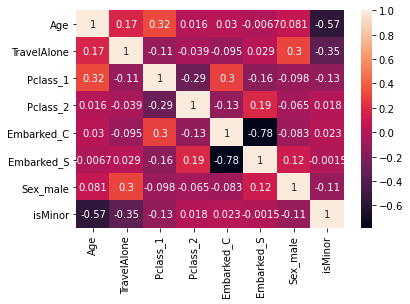

In [42]:
sns.heatmap(X.corr(), annot=True)

### 6. Modeling 

#### 6. 1 Splitting the data

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
#Splitting the data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=2)

#### 6.2 Scaling the data

In [45]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [47]:
X_train

array([[ 0.83137796,  0.81220297,  1.75173383, ..., -1.53573779,
         0.74242727, -0.31963602],
       [-1.99608479, -1.23121934, -0.57086298, ...,  0.65115282,
        -1.34693328,  3.12855858],
       [ 1.38116239,  0.81220297, -0.57086298, ...,  0.65115282,
         0.74242727, -0.31963602],
       ...,
       [ 3.26613756,  0.81220297,  1.75173383, ..., -1.53573779,
         0.74242727, -0.31963602],
       [-0.11110962,  0.81220297,  1.75173383, ...,  0.65115282,
         0.74242727, -0.31963602],
       [-0.11110962,  0.81220297,  1.75173383, ...,  0.65115282,
         0.74242727, -0.31963602]])

#### 6.3 Training the data

In [48]:
#calling the Logistic Regression
logreg=LogisticRegression()

In [49]:
#training the data
logreg.fit(X_train,y_train)

LogisticRegression()

In [50]:
#Coefficients
logreg.coef_

array([[-0.34407386,  0.04013688,  0.99774272,  0.57132739, -0.02148154,
        -0.24352487, -1.26907929,  0.21999373]])

In [51]:
#intercepts
logreg.intercept_

array([-0.76659644])

In [52]:
#testing (predicting)
y_prod=logreg.predict(X_test)

In [53]:
y_prod

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0], dtype=int64)

#### 6.4 Testing the data

In [56]:
# testing (predicting probabilities)
y_pred_proba=logreg.predict_proba(X_test)

In [57]:
y_pred_proba[0:10]

array([[0.68552103, 0.31447897],
       [0.92615797, 0.07384203],
       [0.20305099, 0.79694901],
       [0.93809691, 0.06190309],
       [0.4629366 , 0.5370634 ],
       [0.94116218, 0.05883782],
       [0.85889781, 0.14110219],
       [0.93321841, 0.06678159],
       [0.74601467, 0.25398533],
       [0.78772299, 0.21227701]])

### 7. Model Evaluation

In [58]:
#model evaluation using roc_auc_score
from sklearn.metrics import roc_auc_score

In [59]:
prob_target=y_pred_proba[:,1] #selecting the target

In [60]:
auc=roc_auc_score(y_test,prob_target)
round(auc,2) 

0.84

In [61]:
# model evaluation using accuracy score
from sklearn.metrics import accuracy_score

In [62]:
acc_score=accuracy_score(y_prod,y_test)
acc_score

0.7932960893854749

In [63]:
# model evaluation using score
logreg.score(X_test,y_test)
## as you can see it gives the same answer as the accuracy score

0.7932960893854749

### 8. Model Evaluation Using Cross Validation

In [64]:
# Using KFold CV
from sklearn.model_selection import cross_val_score

In [70]:
score_cv=cross_val_score(logreg,X_train,y_train,cv=10)

In [71]:
score_cv.mean()

0.811737089201878

In [73]:
# Using Stratified KFold CV
from sklearn.model_selection import StratifiedKFold

In [74]:
skf=StratifiedKFold(n_splits=10, random_state=None)
skf.get_n_splits(X,y)

10

In [77]:
accuracy=[]
for train_index, test_index in skf.split(X,y):
    X_train1,X_test1= X.iloc[train_index], X.iloc[test_index]
    y_train1, y_test1= y.iloc[train_index], y.iloc[test_index]
    logreg.fit(X_train1,y_train1)
    prediction1=logreg.predict(X_test1)
    score1=accuracy_score(prediction1,y_test1)
    accuracy.append(score1)

C:\Users\write\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\write\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [85]:
accuracy

[0.8,
 0.797752808988764,
 0.7865168539325843,
 0.8539325842696629,
 0.7752808988764045,
 0.797752808988764,
 0.7752808988764045,
 0.7752808988764045,
 0.8314606741573034,
 0.8089887640449438]

In [86]:
np.array(accuracy).mean()

0.8002247191011236

In [87]:
#An other way of using KFold
from sklearn.model_selection import KFold

In [88]:
kf=KFold(n_splits=10)
kf.get_n_splits(X,y)

10

In [89]:
accuracy1=[]
for train_index, test_index in kf.split(X,y):
    X_train2,X_test2= X.iloc[train_index], X.iloc[test_index]
    y_train2, y_test2= y.iloc[train_index], y.iloc[test_index]
    logreg.fit(X_train1,y_train1)
    prediction2=logreg.predict(X_test1)
    score2=accuracy_score(prediction1,y_test1)
    accuracy1.append(score2)

In [90]:
np.array(accuracy1).mean()

0.8089887640449438

### 9. Model Tuning using GridSearchCV

In [91]:
from sklearn.model_selection import GridSearchCV

In [92]:
parameters={'C':[0.5,1,10,100]}
grid_search=GridSearchCV(estimator=logreg,
                        param_grid=parameters)
grid_search=grid_search.fit(X_train,y_train)


In [93]:
grid_search.best_params_

{'C': 10}

In [94]:
grid_search.best_score_

0.8061459667093469

In [ ]:
# we can now see the best parameters we can use calling the regression

### 10. Re- Model Again

In [99]:
loglog=LogisticRegression(C=10)
loglog.fit(X_train,y_train)

LogisticRegression(C=100)

In [101]:
loglog.score(X_test,y_test)

0.7932960893854749